# Initializers

Assuming fairly reasonable data normalization, the expectation of the weights should be zero or close to it. It might be reasonable, then, to set all of the initial weights to zero because a positive initial weight will have further to go if it should actually be a negative weight and visa versa. This, however, does not work. If all of the weights are the same, they will all have the same error and the model will not learn anything - there is no source of asymmetry between the neurons. Instead, we keep the weights very close to zero but make them different by initializing them to small, non-zero numbers - this is weight initialization and in caffe2 fillers play the role of initializers. (Ref - datascience.stackexchange) 

Import all libraries

In [1]:
from matplotlib import pyplot as plt            #Plotting the variables
import numpy as np                              #Numeric array operations
import time                                     #Clocking the cuntions 

from caffe2.python import core, workspace       #Core creates layers, workspace holds data  
from caffe2.proto import caffe2_pb2             #Save layers as files
print "Import Complete"

Import Complete


# 1. Filler: Constant

Filler details: Generates a blob filled with a constant value. Usually used for filling biases.

In [9]:
workspace.ResetWorkspace()

True

In [10]:
op = core.CreateOperator(
    "ConstantFill",                      # The type of operator that we want to run
    [],                                  # Inputs
    ["Y"],                               # Output
    value=1.0,
    shape=[1,3,100,100],
)

workspace.RunOperatorOnce(op)

print("Current blobs in the workspace: {}\n".format(workspace.Blobs()))
output_data1 = workspace.FetchBlob("Y")             #Fetching the data back
print "output_data1 blob shape = ", output_data1.shape
print("Y:\n{}\n".format(workspace.FetchBlob("Y")))

Current blobs in the workspace: [u'Y']

output_data1 blob shape =  (1, 3, 100, 100)
Y:
[[[[1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   ...
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]]

  [[1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   ...
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]]

  [[1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   ...
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]]]]



# 2. Filler: Diagonal

Filler details: Generates a square blob filled with a constant value in its diagonal. Usually used for filling biases.

In [11]:
workspace.ResetWorkspace()

True

In [12]:
op = core.CreateOperator(
    "DiagonalFill",                      # The type of operator that we want to run
    [],                                  # Inputs
    ["Y"],                               # Output
    value=-1.5,
    shape=[100,100],
)

workspace.RunOperatorOnce(op)

print("Current blobs in the workspace: {}\n".format(workspace.Blobs()))
output_data1 = workspace.FetchBlob("Y")             #Fetching the data back
print "output_data1 blob shape = ", output_data1.shape
print("Y:\n{}\n".format(workspace.FetchBlob("Y")))

Current blobs in the workspace: [u'Y']

output_data1 blob shape =  (100, 100)
Y:
[[-1.5  0.   0.  ...  0.   0.   0. ]
 [ 0.  -1.5  0.  ...  0.   0.   0. ]
 [ 0.   0.  -1.5 ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ... -1.5  0.   0. ]
 [ 0.   0.   0.  ...  0.  -1.5  0. ]
 [ 0.   0.   0.  ...  0.   0.  -1.5]]



# 3. Filler: Gaussian

Filler details: Generates a blob filled with values generated by a guassian function when specified its mean and standard deviation. Usually used for filling weights.

Filler Function: 

$$P(x) = \frac{1}{{\sigma \sqrt {2\pi } }}e^{{{ - \left( {x - \mu } \right)^2 } / {2\sigma ^2 }}} $$

Standard deviation -> $$\sigma$$ 
Mean -> $$\mu$$


In [13]:
workspace.ResetWorkspace()

True

In [14]:
op = core.CreateOperator(
    "GaussianFill",                      # The type of operator that we want to run
    [],                                  # Inputs
    ["Y"],                               # Output
    mean=0.0,
    std=1.0,
    shape=[1,3,100,100],
)

workspace.RunOperatorOnce(op)

print("Current blobs in the workspace: {}\n".format(workspace.Blobs()))
output_data1 = workspace.FetchBlob("Y")             #Fetching the data back
print "output_data1 blob shape = ", output_data1.shape
print("Y:\n{}\n".format(workspace.FetchBlob("Y")))

Current blobs in the workspace: [u'Y']

output_data1 blob shape =  (1, 3, 100, 100)
Y:
[[[[-2.7208742e-02  1.8605140e+00  1.3401612e+00 ... -1.9459589e+00
    -1.8355805e-01  1.1476872e+00]
   [-1.0317578e+00 -9.2503387e-01 -1.6910071e+00 ...  3.2578641e-01
    -1.3654517e+00  1.3249282e+00]
   [ 3.3635072e-02 -5.2488256e-01  2.3202509e-01 ... -1.8634307e-01
    -1.1979079e+00 -1.0280048e+00]
   ...
   [ 8.8207960e-02  7.0647252e-01 -3.4699577e-01 ... -1.3074943e-01
    -1.4389457e+00  6.4721870e-01]
   [ 8.1686094e-02  6.0301113e-01  1.4900988e+00 ... -2.0364556e-01
     2.0474133e+00  7.7330679e-02]
   [ 4.8054972e-01  3.4839222e-03  8.9275575e-01 ... -5.1768380e-01
    -2.1811980e-03  1.3668978e+00]]

  [[ 9.7451150e-01 -5.9634888e-01  9.0201288e-01 ...  9.3265849e-01
     1.3032607e+00  4.5035738e-01]
   [ 1.6507663e-01  5.1381654e-01 -1.1267667e+00 ...  2.8291878e-01
     6.5497088e-01 -1.4248044e+00]
   [ 1.2644882e+00 -1.5056279e+00  1.5272266e+00 ...  3.1550825e-01
    -8.00588

# 4. Filler: Uniform

Filler details: Generates a blob filled with values generated by a uniform function when specified its minimum and maximum range values. Usually used for filling weights.

In [15]:
workspace.ResetWorkspace()

True

In [16]:
op = core.CreateOperator(
    "UniformFill",                      # The type of operator that we want to run
    [],                                  # Inputs
    ["Y"],                               # Output
    mean=0.0,
    std=1.0,
    shape=[1,3,100,100],
)

workspace.RunOperatorOnce(op)

print("Current blobs in the workspace: {}\n".format(workspace.Blobs()))
output_data1 = workspace.FetchBlob("Y")             #Fetching the data back
print "output_data1 blob shape = ", output_data1.shape
print("Y:\n{}\n".format(workspace.FetchBlob("Y")))

Current blobs in the workspace: [u'Y']

output_data1 blob shape =  (1, 3, 100, 100)
Y:
[[[[0.3392981  0.4920335  0.12651451 ... 0.26706678 0.23809844
    0.7786376 ]
   [0.9582259  0.452257   0.53275883 ... 0.9848189  0.59309095
    0.2882785 ]
   [0.0423877  0.919646   0.44542962 ... 0.2791455  0.2839331
    0.60029805]
   ...
   [0.31680357 0.93511266 0.8756118  ... 0.59136283 0.25160292
    0.26761258]
   [0.9546697  0.8118115  0.9461675  ... 0.10610344 0.89939827
    0.38373634]
   [0.8475176  0.8458115  0.16170472 ... 0.51870036 0.11079739
    0.07355351]]

  [[0.87120175 0.58114386 0.5717167  ... 0.18553035 0.6062569
    0.26734623]
   [0.6092372  0.6974833  0.9690413  ... 0.9885078  0.67949283
    0.48164305]
   [0.6854583  0.23517719 0.31614122 ... 0.97349614 0.95112675
    0.7181974 ]
   ...
   [0.15323745 0.11114889 0.45790488 ... 0.40893725 0.19110121
    0.24365632]
   [0.5102444  0.20981261 0.60793793 ... 0.2815019  0.42414168
    0.37863564]
   [0.87918913 0.8831598  0.51

# 4. Filler: Xavier

Filler details: One good way is to assign the weights from a Gaussian distribution. Obviously this distribution would have zero mean and some finite variance. With each passing layer, we want the variance to remain the same. This helps us keep the signal from exploding to a high value or vanishing to zero. In other words, we need to initialize the weights in such a way that the variance remains the same for x and y ($$y_i = w_i*x_i+b_i$$). This initialization process is known as Xavier initialization. (Ref - https://prateekvjoshi.com/2016/03/29/understanding-xavier-initialization-in-deep-neural-networks/) 

In [17]:
workspace.ResetWorkspace()

True

In [18]:
op = core.CreateOperator(
    "XavierFill",                      # The type of operator that we want to run
    [],                                  # Inputs
    ["Y"],                               # Output
    shape=[1,3,100,100],
)

workspace.RunOperatorOnce(op)

print("Current blobs in the workspace: {}\n".format(workspace.Blobs()))
output_data1 = workspace.FetchBlob("Y")             #Fetching the data back
print "output_data1 blob shape = ", output_data1.shape
print("Y:\n{}\n".format(workspace.FetchBlob("Y")))

Current blobs in the workspace: [u'Y']

output_data1 blob shape =  (1, 3, 100, 100)
Y:
[[[[ 3.0201944e-03  7.4131228e-03 -5.6186179e-03 ... -8.3116293e-03
     7.8045428e-03  2.5014654e-03]
   [ 8.1959385e-03 -4.0988540e-03 -1.6142055e-04 ... -7.3929396e-03
     5.2170977e-03  9.8491982e-03]
   [ 9.8190047e-03  6.9875550e-03  3.9832573e-04 ... -5.0197700e-03
    -7.1857339e-03 -7.5253607e-03]
   ...
   [ 1.8086806e-03 -1.1369744e-03  5.9120338e-03 ...  8.4073562e-03
    -9.9160839e-03 -6.4746789e-03]
   [-3.5037468e-03  7.0016365e-03 -3.3855508e-03 ... -1.5093265e-03
     1.6281828e-03  3.2045748e-03]
   [-3.4459378e-03 -5.8587031e-03  2.5901012e-05 ... -2.3018951e-03
     6.5810326e-03  8.8225622e-03]]

  [[-4.9506794e-03  3.9293896e-03  3.5598027e-03 ... -7.6840324e-03
     6.0295481e-03 -1.9379416e-03]
   [ 1.3587940e-03  7.7496525e-03  9.3707461e-03 ... -2.6909476e-03
     3.2597240e-03  3.1501595e-03]
   [-7.7265068e-03 -7.1961493e-03  8.8911932e-03 ... -9.3680806e-03
     3.86221

# 4. Filler: MSRA

Filler details: Variant of Xavier filler. Introduced in caffe v1.

In [19]:
workspace.ResetWorkspace()

True

In [20]:
op = core.CreateOperator(
    "MSRAFill",                      # The type of operator that we want to run
    [],                                  # Inputs
    ["Y"],                               # Output
    shape=[1,3,100,100],
)

workspace.RunOperatorOnce(op)

print("Current blobs in the workspace: {}\n".format(workspace.Blobs()))
output_data1 = workspace.FetchBlob("Y")             #Fetching the data back
print "output_data1 blob shape = ", output_data1.shape
print("Y:\n{}\n".format(workspace.FetchBlob("Y")))

Current blobs in the workspace: [u'Y']

output_data1 blob shape =  (1, 3, 100, 100)
Y:
[[[[-0.00677311 -0.01738431  0.01772585 ... -0.0013369   0.00993694
    -0.03332539]
   [ 0.02923565 -0.00170157 -0.01091725 ...  0.00872084  0.01478975
     0.01710992]
   [ 0.00827969 -0.00756499  0.01339058 ...  0.01961535 -0.00961402
     0.01514838]
   ...
   [ 0.00607628  0.0011068  -0.01788989 ... -0.0165804  -0.00708509
     0.01785469]
   [-0.01042639  0.01188143  0.007033   ... -0.00706194 -0.00490387
    -0.00523129]
   [ 0.00816684  0.0034749   0.00101617 ...  0.0122927   0.00624652
    -0.01117847]]

  [[-0.01427509 -0.00733254  0.00021133 ...  0.00169657  0.00642907
    -0.00139695]
   [-0.01733812 -0.03446689  0.00583131 ... -0.00047469  0.002245
     0.00871252]
   [ 0.02446129 -0.00768537  0.00846224 ...  0.00041484  0.0041176
     0.0160145 ]
   ...
   [ 0.0184339   0.0031943   0.00386364 ... -0.00246572  0.01736321
    -0.01589323]
   [ 0.02079595 -0.0103161  -0.00292767 ... -0.009

# Effect on training with different initializers (fillers)

In [1]:
from matplotlib import pyplot
import numpy as np
import os
import shutil
import caffe2.python.predictor.predictor_exporter as pe
from caffe2.python import (
    brew,
    core,
    model_helper,
    net_drawer,
    optimizer,
    visualize,
    workspace,
)
from IPython.display import Markdown
from ipy_table import *
# If you would like to see some really detailed initializations,
# you can change --caffe2_log_level=0 to --caffe2_log_level=-1
core.GlobalInit(['caffe2', '--caffe2_log_level=0'])

def printmd(string):
    display(Markdown(string))
print("Necessities imported!")

Necessities imported!


In [2]:
# Download Data

# Adopted from: https://caffe2.ai/docs/tutorial-MNIST.html

def DownloadResource(url, path):
    '''Downloads resources from s3 by url and unzips them to the provided path'''
    import requests, zipfile, StringIO
    print("Downloading... {} to {}".format(url, path))
    r = requests.get(url, stream=True)
    z = zipfile.ZipFile(StringIO.StringIO(r.content))
    z.extractall(path)
    print("Completed download and extraction.")
    
current_folder = os.path.join(os.path.expanduser('~'), 'caffe2_notebooks')
data_folder = os.path.join(current_folder, 'tutorial_data', 'mnist')
root_folder = os.path.join(current_folder, 'tutorial_files', 'tutorial_mnist')
db_missing = False

if not os.path.exists(data_folder):
    os.makedirs(data_folder)   
    print("Your data folder was not found!! This was generated: {}".format(data_folder))

# Look for existing database: lmdb
if os.path.exists(os.path.join(data_folder,"mnist-train-nchw-lmdb")):
    printmd("**lmdb train db found!**")
else:
    db_missing = True

if os.path.exists(os.path.join(data_folder,"mnist-test-nchw-lmdb")):
    printmd("**lmdb test db found!**")
else:
    db_missing = True

# attempt the download of the db if either was missing
if db_missing:
    print("one or both of the MNIST lmbd dbs not found!!")
    db_url = "http://download.caffe2.ai/databases/mnist-lmdb.zip"
    try:
        DownloadResource(db_url, data_folder)
    except Exception as ex:
        print("Failed to download dataset. Please download it manually from {}".format(db_url))
        print("Unzip it and place the two database folders here: {}".format(data_folder))
        raise ex

if os.path.exists(root_folder):
    printmd("Looks like you ran this before, so we need to cleanup those old files...")
    shutil.rmtree(root_folder)

os.makedirs(root_folder)
workspace.ResetWorkspace(root_folder)

printmd("**data folder:**" + data_folder)
printmd("**workspace root folder:**" + root_folder)

**lmdb train db found!**

**lmdb test db found!**

Looks like you ran this before, so we need to cleanup those old files...

**data folder:**/home/abhi/caffe2_notebooks/tutorial_data/mnist

**workspace root folder:**/home/abhi/caffe2_notebooks/tutorial_files/tutorial_mnist

In [43]:
# Constant hyperparameters

arg_scope = {"order": "NCHW"}

def AddInput(model, batch_size, db, db_type):
    # load the data
    data_uint8, label = brew.db_input(
        model,
        blobs_out=["data_uint8", "label"],
        batch_size=batch_size,
        db=db,
        db_type=db_type,
    )
    # cast the data to float
    data = model.Cast(data_uint8, "data", to=core.DataType.FLOAT)
    # scale data from [0,255] down to [0,1]
    data = model.Scale(data, data, scale=float(1./256))
    # don't need the gradient for the backward pass
    data = model.StopGradient(data, data)
    return data, label

def AddAccuracy(model, softmax, label):
    """Adds an accuracy op to the model"""
    accuracy = model.Accuracy([softmax, label], "accuracy")
    return accuracy

def AddModel(model, data):
    return AddLeNetModel(model, data)

base_lr = 0.001
m_high = 0.9
def AddTrainingOperators(model, softmax, label):
    xent = model.LabelCrossEntropy([softmax, label], 'xent')
    loss = model.AveragedLoss(xent, "loss")
    AddAccuracy(model, softmax, label)
    model.AddGradientOperators([loss])
    optimizer.build_sgd(
        model,
        nesterov=1,
        momentum=m_high,
        base_learning_rate=base_lr,
        policy="step",
        stepsize=1,
        gamma=0.999,
    )

## 1. Constant initialization - Very High value

**Training status: Running**  Wait till the process is completed

    Completed iterations: 0 , Total iterations to be completed: 2000 , Current Loss =  43.17347
    Completed iterations: 100 , Total iterations to be completed: 2000 , Current Loss =  43.17347
    Completed iterations: 200 , Total iterations to be completed: 2000 , Current Loss =  37.417007
    Completed iterations: 300 , Total iterations to be completed: 2000 , Current Loss =  41.734352
    Completed iterations: 400 , Total iterations to be completed: 2000 , Current Loss =  41.014793
    Completed iterations: 500 , Total iterations to be completed: 2000 , Current Loss =  41.734352
    Completed iterations: 600 , Total iterations to be completed: 2000 , Current Loss =  39.57568
    Completed iterations: 700 , Total iterations to be completed: 2000 , Current Loss =  43.17347
    Completed iterations: 800 , Total iterations to be completed: 2000 , Current Loss =  41.014797
    Completed iterations: 900 , Total iterations to be completed: 2000 , Current Loss =  35.977894
    Completed it

**Training status: Completed**

**Testing status: Running**  Wait till the process is completed

    Completed test set: 0 , Total sets to be tested: 1000
    Completed test set: 100 , Total sets to be tested: 1000
    Completed test set: 200 , Total sets to be tested: 1000
    Completed test set: 300 , Total sets to be tested: 1000
    Completed test set: 400 , Total sets to be tested: 1000
    Completed test set: 500 , Total sets to be tested: 1000
    Completed test set: 600 , Total sets to be tested: 1000
    Completed test set: 700 , Total sets to be tested: 1000
    Completed test set: 800 , Total sets to be tested: 1000
    Completed test set: 900 , Total sets to be tested: 1000


**Testing status: Completed**

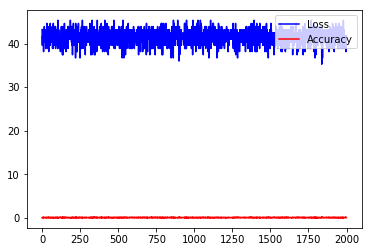

In [35]:
##################################################################################################
def AddLeNetModel(model, data):
    # Image size: 28 x 28 -> 24 x 24
    conv1 = brew.conv(model, data, 'conv1', dim_in=1, dim_out=20, kernel=5, \
                weight_init=('ConstantFill', dict(value=1000.0)),
                bias_init=('ConstantFill', dict(value=1000.0)))
    # Image size: 24 x 24 -> 12 x 12
    pool1 = model.net.MaxPool(conv1, 'pool1', kernel=2, stride=2)
    # Image size: 12 x 12 -> 8 x 8
    conv2 = brew.conv(model, pool1, 'conv2', dim_in=20, dim_out=50, kernel=5, \
                weight_init=('ConstantFill', dict(value=1000.0)),
                bias_init=('ConstantFill', dict(value=1000.0)))
    # Image size: 8 x 8 -> 4 x 4
    pool2 = model.net.MaxPool(conv2, 'pool2', kernel=2, stride=2)
    # 50 * 4 * 4 stands for dim_out from previous layer multiplied by the image size
    fc3 = brew.fc(model, pool2, 'fc3', dim_in=50 * 4 * 4, dim_out=500, \
                weight_init=('ConstantFill', dict(value=1000.0)),
                bias_init=('ConstantFill', dict(value=1000.0)))
    fc3 = model.net.Relu(fc3, 'relu3')
    pred = brew.fc(model, fc3, 'pred', 500, 10)
    softmax = model.net.Softmax(pred, 'softmax')
    return softmax
###################################################################################################


#TRAINING and TESTING
train_model = model_helper.ModelHelper(name="mnist_train", arg_scope=arg_scope)
data, label = AddInput(
    train_model, batch_size=64,
    db=os.path.join(data_folder, 'mnist-train-nchw-lmdb'),
    db_type='lmdb')

softmax = AddModel(train_model, data)
AddTrainingOperators(train_model, softmax, label)

workspace.ResetWorkspace()
workspace.RunNetOnce(train_model.param_init_net)
workspace.CreateNet(train_model.net, overwrite=True)
total_iters_c_h = 2000
accuracy_c_h = np.zeros(total_iters_c_h)
loss_c_h = np.zeros(total_iters_c_h)
printmd('**Training status: Running**  Wait till the process is completed')
for i in range(total_iters_c_h):
    workspace.RunNet(train_model.net)
    if(i%100 == 0):
        print "    Completed iterations:", i, ", Total iterations to be completed:", total_iters_c_h, \
        ", Current Loss = ", workspace.blobs['loss']
    accuracy_c_h[i] = workspace.blobs['accuracy']
    loss_c_h[i] = workspace.blobs['loss']
#print "Training completed"
printmd('**Training status: Completed**')

#print "Testing status: Running"
printmd('**Testing status: Running**  Wait till the process is completed')
test_model = model_helper.ModelHelper(
    name="mnist_test", arg_scope=arg_scope, init_params=False)
data, label = AddInput(
    test_model, batch_size=100,
    db=os.path.join(data_folder, 'mnist-test-nchw-lmdb'),
    db_type='lmdb')
softmax = AddModel(test_model, data)
AddAccuracy(test_model, softmax, label)
workspace.RunNetOnce(test_model.param_init_net)
workspace.CreateNet(test_model.net, overwrite=True)
test_iters_c_h = 1000
test_accuracy_c_h = np.zeros(test_iters_c_h)
for i in range(test_iters_c_h):
    if(i%100 == 0):
        print "    Completed test set:", i, ", Total sets to be tested:", test_iters_c_h
    workspace.RunNet(test_model.net.Proto().name)
    test_accuracy_c_h[i] = workspace.FetchBlob('accuracy')
#print "Testing completed"
printmd('**Testing status: Completed**')
# After the execution is done, let's plot the values.
pyplot.plot(loss_c_h, 'b')
pyplot.plot(accuracy_c_h, 'r')
pyplot.legend(('Loss', 'Accuracy'), loc='upper right')


In [37]:
printmd('**Effects of Initializers**')

initializers = [
    ['Initializer Type', 'Num iterations', 'Init LR', 'Init Loss', 'Final Loss', 'Init Training-Acc(%)', \
     'Final Training-Acc(%)', 'Final Testing-Acc(%)'],
    ['Constant - high', total_iters_c_h, base_lr, loss_c_h[0], loss_c_h[total_iters_c_h-1], accuracy_c_h[0]*100, \
     accuracy_c_h[total_iters_c_h-1]*100, np.mean(test_accuracy_c_h)*100],

];
make_table(initializers)
apply_theme('basic')

**Effects of Initializers**

Initializer Type,Num iterations,Init LR,Init Loss,Final Loss,Init Training-Acc(%),Final Training-Acc(%),Final Testing-Acc(%)
Constant - high,2000,0.0010,43.1735,41.7344,6.2500,9.3750,10.3200


## 2. Constant initialization - Zero

**Training status: Running**  Wait till the process is completed

    Completed iterations: 0 , Total iterations to be completed: 2000 , Current Loss =  2.3025854
    Completed iterations: 100 , Total iterations to be completed: 2000 , Current Loss =  2.302477
    Completed iterations: 200 , Total iterations to be completed: 2000 , Current Loss =  2.3025482
    Completed iterations: 300 , Total iterations to be completed: 2000 , Current Loss =  2.3018017
    Completed iterations: 400 , Total iterations to be completed: 2000 , Current Loss =  2.3040066
    Completed iterations: 500 , Total iterations to be completed: 2000 , Current Loss =  2.3035283
    Completed iterations: 600 , Total iterations to be completed: 2000 , Current Loss =  2.2995036
    Completed iterations: 700 , Total iterations to be completed: 2000 , Current Loss =  2.3060343
    Completed iterations: 800 , Total iterations to be completed: 2000 , Current Loss =  2.3040578
    Completed iterations: 900 , Total iterations to be completed: 2000 , Current Loss =  2.29848
    Completed i

**Training status: Completed**

**Testing status: Running**  Wait till the process is completed

    Completed test set: 0 , Total sets to be tested: 1000
    Completed test set: 100 , Total sets to be tested: 1000
    Completed test set: 200 , Total sets to be tested: 1000
    Completed test set: 300 , Total sets to be tested: 1000
    Completed test set: 400 , Total sets to be tested: 1000
    Completed test set: 500 , Total sets to be tested: 1000
    Completed test set: 600 , Total sets to be tested: 1000
    Completed test set: 700 , Total sets to be tested: 1000
    Completed test set: 800 , Total sets to be tested: 1000
    Completed test set: 900 , Total sets to be tested: 1000


**Testing status: Completed**

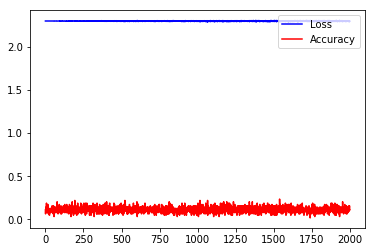

In [44]:
##################################################################################################
def AddLeNetModel(model, data):
    # Image size: 28 x 28 -> 24 x 24
    conv1 = brew.conv(model, data, 'conv1', dim_in=1, dim_out=20, kernel=5, \
                weight_init=('ConstantFill', dict(value=0.)),
                bias_init=('ConstantFill', dict(value=0.)))
    # Image size: 24 x 24 -> 12 x 12
    pool1 = model.net.MaxPool(conv1, 'pool1', kernel=2, stride=2)
    # Image size: 12 x 12 -> 8 x 8
    conv2 = brew.conv(model, pool1, 'conv2', dim_in=20, dim_out=50, kernel=5, \
                weight_init=('ConstantFill', dict(value=0.)),
                bias_init=('ConstantFill', dict(value=0.)))
    # Image size: 8 x 8 -> 4 x 4
    pool2 = model.net.MaxPool(conv2, 'pool2', kernel=2, stride=2)
    # 50 * 4 * 4 stands for dim_out from previous layer multiplied by the image size
    fc3 = brew.fc(model, pool2, 'fc3', dim_in=50 * 4 * 4, dim_out=500, \
                weight_init=('ConstantFill', dict(value=0.)),
                bias_init=('ConstantFill', dict(value=0.)))
    fc3 = model.net.Relu(fc3, 'relu3')
    pred = brew.fc(model, fc3, 'pred', 500, 10)
    softmax = model.net.Softmax(pred, 'softmax')
    return softmax
###################################################################################################


#TRAINING and TESTING
train_model = model_helper.ModelHelper(name="mnist_train", arg_scope=arg_scope)
data, label = AddInput(
    train_model, batch_size=64,
    db=os.path.join(data_folder, 'mnist-train-nchw-lmdb'),
    db_type='lmdb')

softmax = AddModel(train_model, data)
AddTrainingOperators(train_model, softmax, label)

workspace.ResetWorkspace()
workspace.RunNetOnce(train_model.param_init_net)
workspace.CreateNet(train_model.net, overwrite=True)
total_iters_c_m = 2000
accuracy_c_m = np.zeros(total_iters_c_m)
loss_c_m = np.zeros(total_iters_c_m)
printmd('**Training status: Running**  Wait till the process is completed')
for i in range(total_iters_c_m):
    workspace.RunNet(train_model.net)
    if(i%100 == 0):
        print "    Completed iterations:", i, ", Total iterations to be completed:", total_iters_c_m, \
        ", Current Loss = ", workspace.blobs['loss']
    accuracy_c_m[i] = workspace.blobs['accuracy']
    loss_c_m[i] = workspace.blobs['loss']
#print "Training completed"
printmd('**Training status: Completed**')

#print "Testing status: Running"
printmd('**Testing status: Running**  Wait till the process is completed')
test_model = model_helper.ModelHelper(
    name="mnist_test", arg_scope=arg_scope, init_params=False)
data, label = AddInput(
    test_model, batch_size=100,
    db=os.path.join(data_folder, 'mnist-test-nchw-lmdb'),
    db_type='lmdb')
softmax = AddModel(test_model, data)
AddAccuracy(test_model, softmax, label)
workspace.RunNetOnce(test_model.param_init_net)
workspace.CreateNet(test_model.net, overwrite=True)
test_iters_c_m = 1000
test_accuracy_c_m = np.zeros(test_iters_c_m)
for i in range(test_iters_c_m):
    if(i%100 == 0):
        print "    Completed test set:", i, ", Total sets to be tested:", test_iters_c_m
    workspace.RunNet(test_model.net.Proto().name)
    test_accuracy_c_m[i] = workspace.FetchBlob('accuracy')
#print "Testing completed"
printmd('**Testing status: Completed**')
# After the execution is done, let's plot the values.
pyplot.plot(loss_c_m, 'b')
pyplot.plot(accuracy_c_m, 'r')
pyplot.legend(('Loss', 'Accuracy'), loc='upper right')

In [45]:
printmd('**Effects of Initializers**')

initializers = [
    ['Initializer Type', 'Num iterations', 'Init LR', 'Init Loss', 'Final Loss', 'Init Training-Acc(%)', \
     'Final Training-Acc(%)', 'Final Testing-Acc(%)'],
    ['Constant - high', total_iters_c_h, base_lr, loss_c_h[0], loss_c_h[total_iters_c_h-1], accuracy_c_h[0]*100, \
     accuracy_c_h[total_iters_c_h-1]*100, np.mean(test_accuracy_c_h)*100],
    ['Constant - zero', total_iters_c_m, base_lr, loss_c_m[0], loss_c_m[total_iters_c_m-1], accuracy_c_m[0]*100, \
     accuracy_c_m[total_iters_c_m-1]*100, np.mean(test_accuracy_c_m)*100],

];
make_table(initializers)
apply_theme('basic')

**Effects of Initializers**

Initializer Type,Num iterations,Init LR,Init Loss,Final Loss,Init Training-Acc(%),Final Training-Acc(%),Final Testing-Acc(%)
Constant - high,2000,0.0010,43.1735,41.7344,6.2500,9.3750,10.3200
Constant - zero,2000,0.0010,2.3026,2.3023,10.9375,10.9375,11.3500


## 3. Xavier initialization

**Training status: Running**  Wait till the process is completed

    Completed iterations: 0 , Total iterations to be completed: 2000 , Current Loss =  3.203992
    Completed iterations: 100 , Total iterations to be completed: 2000 , Current Loss =  0.71429974
    Completed iterations: 200 , Total iterations to be completed: 2000 , Current Loss =  0.4001926
    Completed iterations: 300 , Total iterations to be completed: 2000 , Current Loss =  0.32719496
    Completed iterations: 400 , Total iterations to be completed: 2000 , Current Loss =  0.2724344
    Completed iterations: 500 , Total iterations to be completed: 2000 , Current Loss =  0.36996093
    Completed iterations: 600 , Total iterations to be completed: 2000 , Current Loss =  0.18547262
    Completed iterations: 700 , Total iterations to be completed: 2000 , Current Loss =  0.38056624
    Completed iterations: 800 , Total iterations to be completed: 2000 , Current Loss =  0.3353026
    Completed iterations: 900 , Total iterations to be completed: 2000 , Current Loss =  0.3089176
    Comp

**Training status: Completed**

**Testing status: Running**  Wait till the process is completed

    Completed test set: 0 , Total sets to be tested: 1000
    Completed test set: 100 , Total sets to be tested: 1000
    Completed test set: 200 , Total sets to be tested: 1000
    Completed test set: 300 , Total sets to be tested: 1000
    Completed test set: 400 , Total sets to be tested: 1000
    Completed test set: 500 , Total sets to be tested: 1000
    Completed test set: 600 , Total sets to be tested: 1000
    Completed test set: 700 , Total sets to be tested: 1000
    Completed test set: 800 , Total sets to be tested: 1000
    Completed test set: 900 , Total sets to be tested: 1000


**Testing status: Completed**

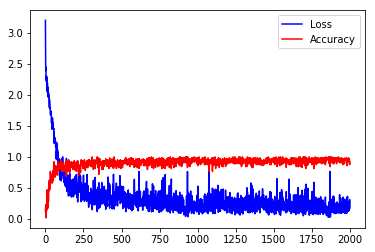

In [47]:
##################################################################################################
def AddLeNetModel(model, data):
    # Image size: 28 x 28 -> 24 x 24
    conv1 = brew.conv(model, data, 'conv1', dim_in=1, dim_out=20, kernel=5, \
                weight_init=('XavierFill', {}),
                bias_init=('XavierFill', {}))
    # Image size: 24 x 24 -> 12 x 12
    pool1 = model.net.MaxPool(conv1, 'pool1', kernel=2, stride=2)
    # Image size: 12 x 12 -> 8 x 8
    conv2 = brew.conv(model, pool1, 'conv2', dim_in=20, dim_out=50, kernel=5, \
                weight_init=('XavierFill', {}),
                bias_init=('XavierFill', {}))
    # Image size: 8 x 8 -> 4 x 4
    pool2 = model.net.MaxPool(conv2, 'pool2', kernel=2, stride=2)
    # 50 * 4 * 4 stands for dim_out from previous layer multiplied by the image size
    fc3 = brew.fc(model, pool2, 'fc3', dim_in=50 * 4 * 4, dim_out=500, \
                weight_init=('XavierFill', {}),
                bias_init=('XavierFill', {}))
    fc3 = model.net.Relu(fc3, 'relu3')
    pred = brew.fc(model, fc3, 'pred', 500, 10)
    softmax = model.net.Softmax(pred, 'softmax')
    return softmax
###################################################################################################


#TRAINING and TESTING
train_model = model_helper.ModelHelper(name="mnist_train", arg_scope=arg_scope)
data, label = AddInput(
    train_model, batch_size=64,
    db=os.path.join(data_folder, 'mnist-train-nchw-lmdb'),
    db_type='lmdb')

softmax = AddModel(train_model, data)
AddTrainingOperators(train_model, softmax, label)

workspace.ResetWorkspace()
workspace.RunNetOnce(train_model.param_init_net)
workspace.CreateNet(train_model.net, overwrite=True)
total_iters_x = 2000
accuracy_x = np.zeros(total_iters_x)
loss_x = np.zeros(total_iters_x)
printmd('**Training status: Running**  Wait till the process is completed')
for i in range(total_iters_x):
    workspace.RunNet(train_model.net)
    if(i%100 == 0):
        print "    Completed iterations:", i, ", Total iterations to be completed:", total_iters_x, \
        ", Current Loss = ", workspace.blobs['loss']
    accuracy_x[i] = workspace.blobs['accuracy']
    loss_x[i] = workspace.blobs['loss']
#print "Training completed"
printmd('**Training status: Completed**')

#print "Testing status: Running"
printmd('**Testing status: Running**  Wait till the process is completed')
test_model = model_helper.ModelHelper(
    name="mnist_test", arg_scope=arg_scope, init_params=False)
data, label = AddInput(
    test_model, batch_size=100,
    db=os.path.join(data_folder, 'mnist-test-nchw-lmdb'),
    db_type='lmdb')
softmax = AddModel(test_model, data)
AddAccuracy(test_model, softmax, label)
workspace.RunNetOnce(test_model.param_init_net)
workspace.CreateNet(test_model.net, overwrite=True)
test_iters_x = 1000
test_accuracy_x = np.zeros(test_iters_x)
for i in range(test_iters_x):
    if(i%100 == 0):
        print "    Completed test set:", i, ", Total sets to be tested:", test_iters_x
    workspace.RunNet(test_model.net.Proto().name)
    test_accuracy_x[i] = workspace.FetchBlob('accuracy')
#print "Testing completed"
printmd('**Testing status: Completed**')
# After the execution is done, let's plot the values.
pyplot.plot(loss_x, 'b')
pyplot.plot(accuracy_x, 'r')
pyplot.legend(('Loss', 'Accuracy'), loc='upper right')

In [51]:
printmd('**Effects of Initializers**')

initializers = [
    ['Initializer Type', 'Num iterations', 'Init LR', 'Init Loss', 'Final Loss', 'Init Training-Acc(%)', \
     'Final Training-Acc(%)', 'Final Testing-Acc(%)'],
    ['Constant - high', total_iters_c_h, base_lr, loss_c_h[0], loss_c_h[total_iters_c_h-1], accuracy_c_h[0]*100, \
     accuracy_c_h[total_iters_c_h-1]*100, np.mean(test_accuracy_c_h)*100],
    ['Constant - zero', total_iters_c_m, base_lr, loss_c_m[0], loss_c_m[total_iters_c_m-1], accuracy_c_m[0]*100, \
     accuracy_c_m[total_iters_c_m-1]*100, np.mean(test_accuracy_c_m)*100],
    ['Xavier', total_iters_x, base_lr, loss_x[0], loss_x[total_iters_x-1], accuracy_x[0]*100, \
     accuracy_x[total_iters_x-1]*100, np.mean(test_accuracy_x)*100],

];
make_table(initializers)
apply_theme('basic')

**Effects of Initializers**

Initializer Type,Num iterations,Init LR,Init Loss,Final Loss,Init Training-Acc(%),Final Training-Acc(%),Final Testing-Acc(%)
Constant - high,2000,0.0010,43.1735,41.7344,6.2500,9.3750,10.3200
Constant - zero,2000,0.0010,2.3026,2.3023,10.9375,10.9375,11.3500
Xavier,2000,0.0010,3.2040,0.1746,12.5000,92.1875,94.2800


## 4. MSRA+Gaussian initialization

**Training status: Running**  Wait till the process is completed

    Completed iterations: 0 , Total iterations to be completed: 2000 , Current Loss =  3.0503173
    Completed iterations: 100 , Total iterations to be completed: 2000 , Current Loss =  1.2514492
    Completed iterations: 200 , Total iterations to be completed: 2000 , Current Loss =  0.52981883
    Completed iterations: 300 , Total iterations to be completed: 2000 , Current Loss =  0.41093937
    Completed iterations: 400 , Total iterations to be completed: 2000 , Current Loss =  0.30870074
    Completed iterations: 500 , Total iterations to be completed: 2000 , Current Loss =  0.37612173
    Completed iterations: 600 , Total iterations to be completed: 2000 , Current Loss =  0.21828662
    Completed iterations: 700 , Total iterations to be completed: 2000 , Current Loss =  0.3924354
    Completed iterations: 800 , Total iterations to be completed: 2000 , Current Loss =  0.39088798
    Completed iterations: 900 , Total iterations to be completed: 2000 , Current Loss =  0.34615397
    C

**Training status: Completed**

**Testing status: Running**  Wait till the process is completed

    Completed test set: 0 , Total sets to be tested: 1000
    Completed test set: 100 , Total sets to be tested: 1000
    Completed test set: 200 , Total sets to be tested: 1000
    Completed test set: 300 , Total sets to be tested: 1000
    Completed test set: 400 , Total sets to be tested: 1000
    Completed test set: 500 , Total sets to be tested: 1000
    Completed test set: 600 , Total sets to be tested: 1000
    Completed test set: 700 , Total sets to be tested: 1000
    Completed test set: 800 , Total sets to be tested: 1000
    Completed test set: 900 , Total sets to be tested: 1000


**Testing status: Completed**

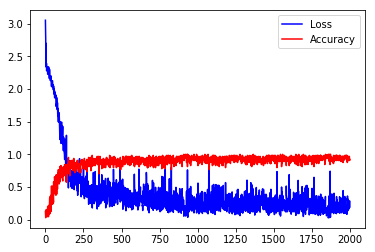

In [50]:
##################################################################################################
def AddLeNetModel(model, data):
    # Image size: 28 x 28 -> 24 x 24
    conv1 = brew.conv(model, data, 'conv1', dim_in=1, dim_out=20, kernel=5, \
                weight_init=('MSRAFill', {}),
                bias_init=('GaussianFill', {}))
    # Image size: 24 x 24 -> 12 x 12
    pool1 = model.net.MaxPool(conv1, 'pool1', kernel=2, stride=2)
    # Image size: 12 x 12 -> 8 x 8
    conv2 = brew.conv(model, pool1, 'conv2', dim_in=20, dim_out=50, kernel=5, \
                weight_init=('MSRAFill', {}),
                bias_init=('GaussianFill', {}))
    # Image size: 8 x 8 -> 4 x 4
    pool2 = model.net.MaxPool(conv2, 'pool2', kernel=2, stride=2)
    # 50 * 4 * 4 stands for dim_out from previous layer multiplied by the image size
    fc3 = brew.fc(model, pool2, 'fc3', dim_in=50 * 4 * 4, dim_out=500, \
                weight_init=('MSRAFill', {}),
                bias_init=('GaussianFill', {}))
    fc3 = model.net.Relu(fc3, 'relu3')
    pred = brew.fc(model, fc3, 'pred', 500, 10)
    softmax = model.net.Softmax(pred, 'softmax')
    return softmax
###################################################################################################


#TRAINING and TESTING
train_model = model_helper.ModelHelper(name="mnist_train", arg_scope=arg_scope)
data, label = AddInput(
    train_model, batch_size=64,
    db=os.path.join(data_folder, 'mnist-train-nchw-lmdb'),
    db_type='lmdb')

softmax = AddModel(train_model, data)
AddTrainingOperators(train_model, softmax, label)

workspace.ResetWorkspace()
workspace.RunNetOnce(train_model.param_init_net)
workspace.CreateNet(train_model.net, overwrite=True)
total_iters_m = 2000
accuracy_m = np.zeros(total_iters_m)
loss_m = np.zeros(total_iters_m)
printmd('**Training status: Running**  Wait till the process is completed')
for i in range(total_iters_m):
    workspace.RunNet(train_model.net)
    if(i%100 == 0):
        print "    Completed iterations:", i, ", Total iterations to be completed:", total_iters_m, \
        ", Current Loss = ", workspace.blobs['loss']
    accuracy_m[i] = workspace.blobs['accuracy']
    loss_m[i] = workspace.blobs['loss']
#print "Training completed"
printmd('**Training status: Completed**')

#print "Testing status: Running"
printmd('**Testing status: Running**  Wait till the process is completed')
test_model = model_helper.ModelHelper(
    name="mnist_test", arg_scope=arg_scope, init_params=False)
data, label = AddInput(
    test_model, batch_size=100,
    db=os.path.join(data_folder, 'mnist-test-nchw-lmdb'),
    db_type='lmdb')
softmax = AddModel(test_model, data)
AddAccuracy(test_model, softmax, label)
workspace.RunNetOnce(test_model.param_init_net)
workspace.CreateNet(test_model.net, overwrite=True)
test_iters_m = 1000
test_accuracy_m = np.zeros(test_iters_m)
for i in range(test_iters_m):
    if(i%100 == 0):
        print "    Completed test set:", i, ", Total sets to be tested:", test_iters_m
    workspace.RunNet(test_model.net.Proto().name)
    test_accuracy_m[i] = workspace.FetchBlob('accuracy')
#print "Testing completed"
printmd('**Testing status: Completed**')
# After the execution is done, let's plot the values.
pyplot.plot(loss_m, 'b')
pyplot.plot(accuracy_m, 'r')
pyplot.legend(('Loss', 'Accuracy'), loc='upper right')

In [52]:
printmd('**Effects of Initializers**')

initializers = [
    ['Initializer Type', 'Num iterations', 'Init LR', 'Init Loss', 'Final Loss', 'Init Training-Acc(%)', \
     'Final Training-Acc(%)', 'Final Testing-Acc(%)'],
    ['Constant - high', total_iters_c_h, base_lr, loss_c_h[0], loss_c_h[total_iters_c_h-1], accuracy_c_h[0]*100, \
     accuracy_c_h[total_iters_c_h-1]*100, np.mean(test_accuracy_c_h)*100],
    ['Constant - zero', total_iters_c_m, base_lr, loss_c_m[0], loss_c_m[total_iters_c_m-1], accuracy_c_m[0]*100, \
     accuracy_c_m[total_iters_c_m-1]*100, np.mean(test_accuracy_c_m)*100],
    ['Xavier', total_iters_x, base_lr, loss_x[0], loss_x[total_iters_x-1], accuracy_x[0]*100, \
     accuracy_x[total_iters_x-1]*100, np.mean(test_accuracy_x)*100],
    ['MSRA-Gaussian', total_iters_m, base_lr, loss_m[0], loss_m[total_iters_m-1], accuracy_m[0]*100, \
     accuracy_m[total_iters_m-1]*100, np.mean(test_accuracy_m)*100],

];
make_table(initializers)
apply_theme('basic')

**Effects of Initializers**

Initializer Type,Num iterations,Init LR,Init Loss,Final Loss,Init Training-Acc(%),Final Training-Acc(%),Final Testing-Acc(%)
Constant - high,2000,0.0010,43.1735,41.7344,6.2500,9.3750,10.3200
Constant - zero,2000,0.0010,2.3026,2.3023,10.9375,10.9375,11.3500
Xavier,2000,0.0010,3.2040,0.1746,12.5000,92.1875,94.2800
MSRA-Gaussian,2000,0.0010,3.0503,0.1932,12.5000,92.1875,94.0900
